## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _Манахова Мария_

### Общая информация

__Дата выдачи:__ 04.03.2019

__Дедлайн:__ 23:59 17.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / \text{max points},
$$

где points — количество баллов, которое вы набрали, max_points - максимальное число баллов за задание. Бонусные задания отмечены звездочками (*)

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).


# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [855]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error as mse
from numpy import linalg as la

In [1041]:
class KNN:
    def __init__(self, metric='euclid', k=5):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train

        return self
            
    def euclidean_distance(self, x1, x2):
        distance = 0.0
        for i in range(len(x1)):
            distance += pow((x1[i] - x2[i]), 2)
            
        return np.sqrt(distance)
    
    def manhattan_distance(self, x1, x2):
        distance = 0.0
        for i in range(len(x1)):
            distance += np.abs(x1[i] - x2[i])
            
        return distance
    
    def distance(self, x1, x2):
        assert(len(x1) == len(x2))

        if self.metric == 'euclid':
            return self.euclidean_distance(x1, x2)
        elif self.metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = np.zeros(X_test.shape[0])
        for i in range(y_pred.shape[0]):
            distances = []
            for j in range(len(X_train)):
                distances.append([self.distance(X_train[j] , X_test[i]), j])  
            distances.sort()
            distances = distances[:self.k]
            
            w_iy_i = 0.0
            w_i = 0.0
            for d_i, j in distances:
                w_iy_i += 1 / d_i * y_train[j]
                w_i += 1 / d_i
            y_pred[i] = w_iy_i / w_i
        
        return y_pred

In [1042]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [1048]:
def compare_knn_results(knn_metric, sklearn_knn_metric, n):
    knn = KNN(knn_metric, n)
    knn.fit(X_train, y_train)
    y_knn_pred = knn.predict(X_test)
    
    sklearn_knn = KNeighborsRegressor(n_neighbors=n, metric=sklearn_knn_metric)
    sklearn_knn.fit(X_train, y_train)
    sklearn_y_knn_pred = sklearn_knn.predict(X_test)
    
    print("mse = " + str(mse(sklearn_y_knn_pred, y_knn_pred)))

In [1049]:
compare_knn_results('euclid', 'euclidean', 5)

mse = 0.0001661118977190541


In [1050]:
compare_knn_results('manhattan', 'manhattan', 7)

mse = 0.00015808191102434588


# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [1108]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.w = np.zeros(X_train.shape[1])
        self.loss_history = []
        for i in range(self.max_iter):
            self.loss_history.append(self.calc_loss(X_train, y_train))
            step = self.eta * self.calc_gradient(X_train, y_train)
            if (la.norm(step) <= self.tol):
                break
            else:
                self.w += step
        
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = X_test @ self.w
        
        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        """
        grad = np.zeros(self.w.shape)
        for i in range (y.shape[0]):
            d = X[i, :] @ self.w - y[i]
            grad -= d * X[i, :] if abs(d) <= self.delta else self.delta * d / abs(d) * X[i, :]
        grad /= y.shape[0]
        
        return grad
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """
        loss = 0.0
        for i in range(0, y.shape[0]):
            d = X[i, :] @ self.w - y[i]
            loss += 0.5 * d**2 if abs(d) <= self.delta else self.delta * abs(d) - 0.5 * self.delta**2
            
        return loss / y.shape[0]   

In [1110]:
def draw_plot(xlabel, ylabel, x, y):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("dependence of the loss function on iteration")
    plt.scatter(x, y)
    plt.show()

def compare_lrh_results(max_iter, eps, alpha, tol):
    lrh = LinearRegressionHuber(max_iter=max_iter, delta=eps, eta=alpha, tol=tol)
    lrh.fit(X_train, y_train)
    lrh.calc_loss(X_train, y_train)
    y_pred_lrh = lrh.predict(X_test)
    
    sklearn_lrh = HuberRegressor(max_iter=max_iter, epsilon=eps, alpha=alpha, tol=tol)
    sklearn_lrh.fit(X_train, y_train)
    sklearn_y_pred_lrh = sklearn_lrh.predict(X_test)
    
    print(mse(sklearn_y_pred_lrh, y_pred_lrh))
    print(lrh.calc_loss(X_test, sklearn_y_pred_lrh))
    
    draw_plot('iteration', 'loss function', [i for i in range(0, len(lrh.loss_history))], lrh.loss_history)

0.015731170084116935
0.007865585042058478


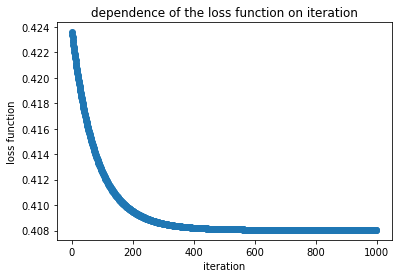

In [1111]:
compare_lrh_results(1000, 1.0, 1e-2, 1e-6)

0.0030298381944794395
0.0015149190972397204


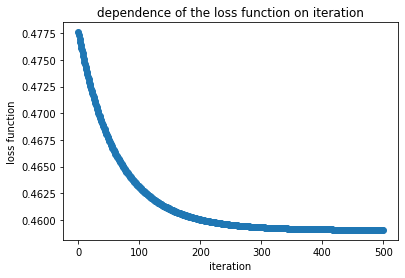

In [1119]:
compare_lrh_results(500, 1.5, 1e-2, 1e-5)

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [1155]:
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder

%matplotlib inline
import matplotlib.pyplot as plt

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [1156]:
data = pd.read_csv('train.csv', header=0)

In [1157]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1158]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1159]:
data.drop('Id', axis=1, inplace=True)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [1160]:
def has_gaps(data):
    return pd.isnull(data).any().any()

def print_amount_of_gaps(data):
    empty_data = data.shape[0] - data.count()
    print('amount of gaps:')
    print(empty_data[empty_data != 0])
    print('\nproportion:')
    print(empty_data[empty_data != 0] / data.shape[0])
    
print('There\'re gaps in data' if has_gaps(X) else 'There\'re no gaps in data\n')
print_amount_of_gaps(X)

There're gaps in data
amount of gaps:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

proportion:
LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

Столбцы <b>Alley, MiscFeature, PoolQC, Fence</b> удалены, так как в них очень велика доля пропусков, из-за чего эти данные имеют небольшую важность.

In [1161]:
X = X.drop(['Alley', 'MiscFeature', 'PoolQC', 'Fence'], axis=1)

Для столбцов с количественными признаками пропуски заполнены средним арифметическим.

In [1162]:
numerical = [c for c in X.columns if X[c].dtype.name != 'object']
for feature in numerical:
    X[feature] = X[feature].fillna(X[feature].mean())

Для столбцов с категориальными признаками пропуски заполнены самым популярным значением.

In [1163]:
categorical = [c for c in X.columns if X[c].dtype.name == 'object']
for feature in categorical:
    X[feature] = X[feature].fillna(X[feature].describe().top)

In [1164]:
print('There\'re gaps in data' if has_gaps(X) else 'There\'re no gaps in data\n')

There're no gaps in data



## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [1165]:
binary = [c for c in categorical if X[c].describe()['unique'] == 2]
non_binary = [c for c in categorical if X[c].describe()['unique'] > 2]

Бинарные признаки закодированы нулями и единицами (label encoding).

In [1166]:
for feature in binary:
    encoded_feature = []
    unique_values = X[feature].unique()
    X.at[X[feature] == unique_values[0], feature] = 0
    X.at[X[feature] == unique_values[1], feature] = 1
    X[feature] = pd.to_numeric(X[feature])

Небинарные категориальные признаки закодированы методом one-hot encoding.

In [1167]:
X = pd.concat([X, pd.get_dummies(X[non_binary])], axis=1)
X = X.drop(X[non_binary], axis=1)

## 4 (0.5)

In [1168]:
corr = X.corr()
corr

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-3.570559e-01,-0.139781,0.024969,-2.284384e-02,0.032628,-0.059316,0.027850,0.040581,0.022895,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.357056,1.000000e+00,0.306795,0.037323,5.171411e-18,0.234196,-0.052820,0.117598,0.082746,0.179283,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.139781,3.067946e-01,1.000000,0.197131,1.012318e-02,0.105806,-0.005636,0.014228,0.013788,0.103960,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
Street,0.024969,3.732277e-02,0.197131,1.000000,-1.681767e-03,-0.058823,-0.042848,-0.021137,-0.065465,-0.017326,...,-0.003766,-0.019397,-0.002915,-0.006539,-0.017512,-0.003367,0.112734,-0.007571,0.002140,-0.019657
Utilities,-0.022844,5.171411e-18,0.010123,-0.001682,1.000000e+00,-0.001881,0.009994,-0.011505,-0.034080,0.063427,...,-0.001535,-0.007905,-0.001188,-0.067078,0.096033,-0.001372,-0.002383,-0.003085,-0.055982,-0.008011
OverallQual,0.032628,2.341962e-01,0.105806,-0.058823,-1.880681e-03,1.000000,-0.091932,0.572323,0.550684,0.410238,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-5.282010e-02,-0.005636,-0.042848,9.994087e-03,-0.091932,1.000000,-0.375983,0.073741,-0.127788,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.027850,1.175980e-01,0.014228,-0.021137,-1.150460e-02,0.572323,-0.375983,1.000000,0.592855,0.314745,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,0.040581,8.274589e-02,0.013788,-0.065465,-3.407977e-02,0.550684,0.073741,0.592855,1.000000,0.179186,...,-0.039952,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
MasVnrArea,0.022895,1.792835e-01,0.103960,-0.017326,6.342665e-02,0.410238,-0.127788,0.314745,0.179186,1.000000,...,-0.022891,0.169156,-0.026065,-0.130559,-0.044758,-0.011959,-0.009689,-0.009914,-0.084241,0.165606


Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

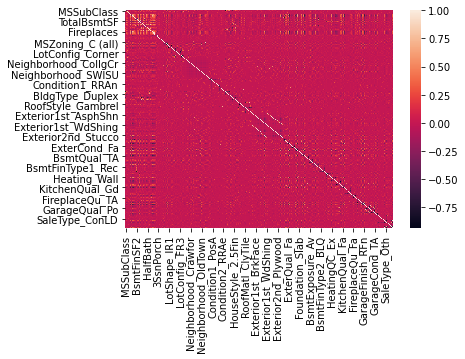

In [1169]:
sns.heatmap(corr)

В среднем между признаками очень слабая линейная связь, можно сказать, она практически отсутствует. 

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [1170]:
corr_pred = {}
for feature in X:
    corr_pred.update( {feature : X[feature].corr(y)} )

corr_pred_values = list(corr_pred.values())  
corr_pred_keys = list(corr_pred.keys())

In [1171]:
def draw_plot(xlabel, ylabel, x, y):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ylabel + " feature dependency on " + xlabel)
    plt.scatter(x, y)
    plt.show()

In [1172]:
def display_min(values, keys):
    _min = min(values, key=abs)
    feature = keys[values.index(_min)]
    print(feature + ": " + str(_min))
    draw_plot('SalePrice', feature, y, X[feature])

In [1173]:
def display_max(values, keys):
    _max = max(values, key=abs)
    feature = keys[values.index(_max)]
    print(feature + ": " + str(_max))
    draw_plot('SalePrice', feature, data['SalePrice'], data[feature])

BsmtFinType2_GLQ: 7.551406179757091e-05


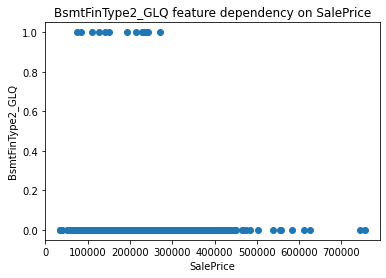

OverallQual: 0.7909816005838044


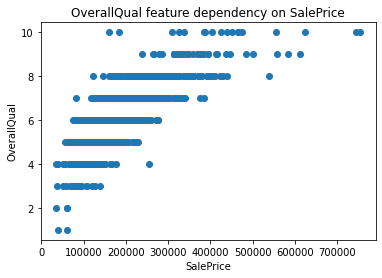

In [1174]:
display_min(corr_pred_values, corr_pred_keys)
display_max(corr_pred_values, corr_pred_keys)

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

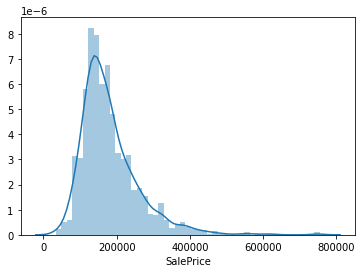

In [1175]:
sns_plot = sns.distplot(y)
fig = sns_plot.get_figure()

In [1176]:
y = np.log1p(y)

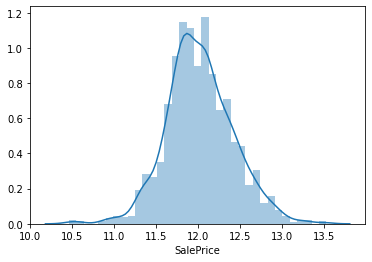

In [1177]:
sns_plot = sns.distplot(y)
fig = sns_plot.get_figure()

Распределение переменной сместилось в сторону нормального.

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [1178]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)

In [1179]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 272), (365, 272), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [1239]:
def find_best_hyperparameters_knn():
    param_grid_knn = {'n_neighbors': np.arange(1, 30), 
                      'metric': ['euclidean', 'minkowski', 'manhattan'], 
                      'weights': ['uniform', 'distance']}
    knn = KNeighborsRegressor()
    gridSearchCVKnn = GridSearchCV(knn, param_grid_knn, scoring='neg_root_mean_squared_error')
    gridSearchCVKnn.fit(X_train, y_train)
    return gridSearchCVKnn.best_params_

bhp_knn = find_best_hyperparameters_knn()
print(bhp_knn)
knn = KNeighborsRegressor(n_neighbors=bhp_knn['n_neighbors'], metric=bhp_knn['metric'], weights=bhp_knn['weights'])
knn.fit(X_train, y_train)
y_val_knn_pred = knn.predict(X_val)
print("rmse = " + str(np.sqrt(mse(y_val_knn_pred, y_val))))

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
rmse = 0.1951328315366398


metric: manhattan <br/>
n_neighbors: 8 <br/>
weights: distance <br/>
rmse = 0.1951328315366398 <br/>

In [1257]:
def find_best_hyperparameters_lr():
    param_grid_lr = {'fit_intercept': [True, False],
                     'normalize': [True, False]}
    lr = LinearRegression()
    gridSearchCVLr = GridSearchCV(lr, param_grid_lr, scoring='neg_root_mean_squared_error')
    gridSearchCVLr.fit(X_train, y_train)
    return gridSearchCVLr.best_params_

bhp_lr = find_best_hyperparameters_lr()
print(bhp_lr)
lr = LinearRegression(fit_intercept=bhp_lr['fit_intercept'], normalize=bhp_lr['normalize'])
lr.fit(X_train, y_train)
y_val_lr_pred = lr.predict(X_val)
print("rmse = " + str(np.sqrt(mse(y_val_lr_pred, y_val))))

{'fit_intercept': True, 'normalize': False}
rmse = 0.13288981465973748


fit_intercept: True<br/>
normalize: False<br/>
rmse = 0.13288981465973748

In [1253]:
def find_best_hyperparameters_lasso():
    param_grid_lasso = {'alpha': np.arange(0.0001, 0.05, 0.0001)}
    lr = Lasso()
    gridSearchCVLasso = GridSearchCV(lasso, param_grid_lasso, scoring='neg_root_mean_squared_error')
    gridSearchCVLasso.fit(X_train, y_train)
    return gridSearchCVLasso.best_params_

bhp_lasso = find_best_hyperparameters_lasso()
print(bhp_lasso)
lasso = Lasso(alpha=bhp_lasso['alpha'])
lasso.fit(X_train, y_train)
y_val_lasso_pred = lasso.predict(X_val)
print("rmse = " + str(np.sqrt(mse(y_val_lasso_pred, y_val))))

{'alpha': 0.0005}
rmse = 0.12029079597702326


alpha = 0.0005 <br/>
rmse = 0.12029079597702326

In [1258]:
def find_best_hyperparameters_ridge():
    param_grid_ridge = {'alpha': np.arange(0.5, 100, 0.1)}
    lr = Ridge()
    gridSearchCVRidge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_root_mean_squared_error')
    gridSearchCVRidge.fit(X_train, y_train)
    return gridSearchCVRidge.best_params_

bhp_ridge = find_best_hyperparameters_ridge()
print(bhp_ridge)
ridge = Ridge(max_iter=750, alpha=bhp_ridge['alpha'])
ridge.fit(X_train, y_train)
y_val_ridge_pred = ridge.predict(X_val)
print("rmse = " + str(np.sqrt(mse(y_val_ridge_pred, y_val))))

{'alpha': 8.699999999999998}
rmse = 0.13099345876196952


alpha = 8.699999999999998 <br/>
rmse = 0.13099345876196952

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

# Теория

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

*(your solution here)*